## Objective

This lab contains the following tasks:

*   Mark all launch sites on a map
*   Mark the success/failed launches for each site on the map
*   Calculate the distances between a launch site to its proximities

After completed the above tasks, you should be able to find some geographical patterns about launch sites.


In [1]:
import folium
import pandas as pd
import requests

In [2]:
from folium.plugins import MarkerCluster
from folium.plugins import MousePosition
from folium.features import DivIcon

### 1. Mark all launch sites on a map

In [3]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/spacex_launch_geo.csv'
df = pd.read_csv(url,index_col=False)
df.head()

Flight Number        Date Time (UTC) Booster Version  Launch Site  \
0              1  2010-06-04   18:45:00  F9 v1.0  B0003  CCAFS LC-40   
1              2  2010-12-08   15:43:00  F9 v1.0  B0004  CCAFS LC-40   
2              3  2012-05-22    7:44:00  F9 v1.0  B0005  CCAFS LC-40   
3              4  2012-10-08    0:35:00  F9 v1.0  B0006  CCAFS LC-40   
4              5  2013-03-01   15:10:00  F9 v1.0  B0007  CCAFS LC-40   

                                             Payload  Payload Mass (kg)  \
0               Dragon Spacecraft Qualification Unit                0.0   
1  Dragon demo flight C1, two CubeSats,  barrel o...                0.0   
2                             Dragon demo flight C2+              525.0   
3                                       SpaceX CRS-1              500.0   
4                                       SpaceX CRS-2              677.0   

       Orbit         Customer        Landing Outcome  class        Lat  \
0        LEO           SpaceX  Failure   (parachute)      0  28.562302   
1  LEO (ISS)  NASA (COTS) NRO  Failure   (parachute)      0  28.562302   
2  LEO (ISS)      NASA (COTS)             No attempt      0  28.562302   
3  LEO (ISS)       NASA (CRS)             No attempt      0  28.562302   
4  LEO (ISS)       NASA (CRS)             No attempt      0  28.562302   

        Long  
0 -80.577356  
1 -80.577356  
2 -80.577356  
3 -80.577356  
4 -80.577356

In [4]:
df.columns

Index(['Flight Number', 'Date', 'Time (UTC)', 'Booster Version', 'Launch Site',
       'Payload', 'Payload Mass (kg)', 'Orbit', 'Customer', 'Landing Outcome',
       'class', 'Lat', 'Long'],
      dtype='object')

In [5]:
geo_data = df[['Launch Site', 'Lat','Long','class']]
geo_data.head()

Launch Site        Lat       Long  class
0  CCAFS LC-40  28.562302 -80.577356      0
1  CCAFS LC-40  28.562302 -80.577356      0
2  CCAFS LC-40  28.562302 -80.577356      0
3  CCAFS LC-40  28.562302 -80.577356      0
4  CCAFS LC-40  28.562302 -80.577356      0

In [6]:
geo = geo_data.groupby(['Launch Site'], as_index=False).first()
#The first() method returns the first n rows, based on the specified value
ge = geo[['Launch Site', 'Lat','Long']]
ge.head()

Launch Site        Lat        Long
0   CCAFS LC-40  28.562302  -80.577356
1  CCAFS SLC-40  28.563197  -80.576820
2    KSC LC-39A  28.573255  -80.646895
3   VAFB SLC-4E  34.632834 -120.610745

We first need to create a folium `Map` object, with an initial center location to be NASA Johnson Space Center at Houston, Texas.

In [7]:
# Start location is NASA Johnson Space Center
nasa_coordinate = [29.559684888503615, -95.0830971930759]
site_map = folium.Map(location=nasa_coordinate, zoom_start=10)
site_map

In [9]:
# Initial the map
site_map = folium.Map(location=nasa_coordinate, zoom_start=5)

We could use `folium.Circle` to add a highlighted each launch site with a text label on a specific coordinate.

In [10]:
for index,site in ge.iterrows():
    location = [site['Lat'],site['Long']]
    print(site['Launch Site'])
    print(location)

CCAFS LC-40
[28.56230197, -80.57735648]
CCAFS SLC-40
[28.56319718, -80.57682003]
KSC LC-39A
[28.57325457, -80.64689529]
VAFB SLC-4E
[34.63283416, -120.6107455]


In [11]:
for index,site in ge.iterrows():
    location = [site['Lat'],site['Long']]
    circle = folium.Circle(location, radius=1000, color='#d35400', fill= True).add_child(folium.Popup(site['Launch Site']))
    marker = folium.map.Marker(location,
                               icon = DivIcon(
                                   icon_size=(20,20),
                                   icon_anchor=(0,0),
                                   html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % site['Launch Site'],
                               )
                              )
    site_map.add_child(circle)
    site_map.add_child(marker)
site_map

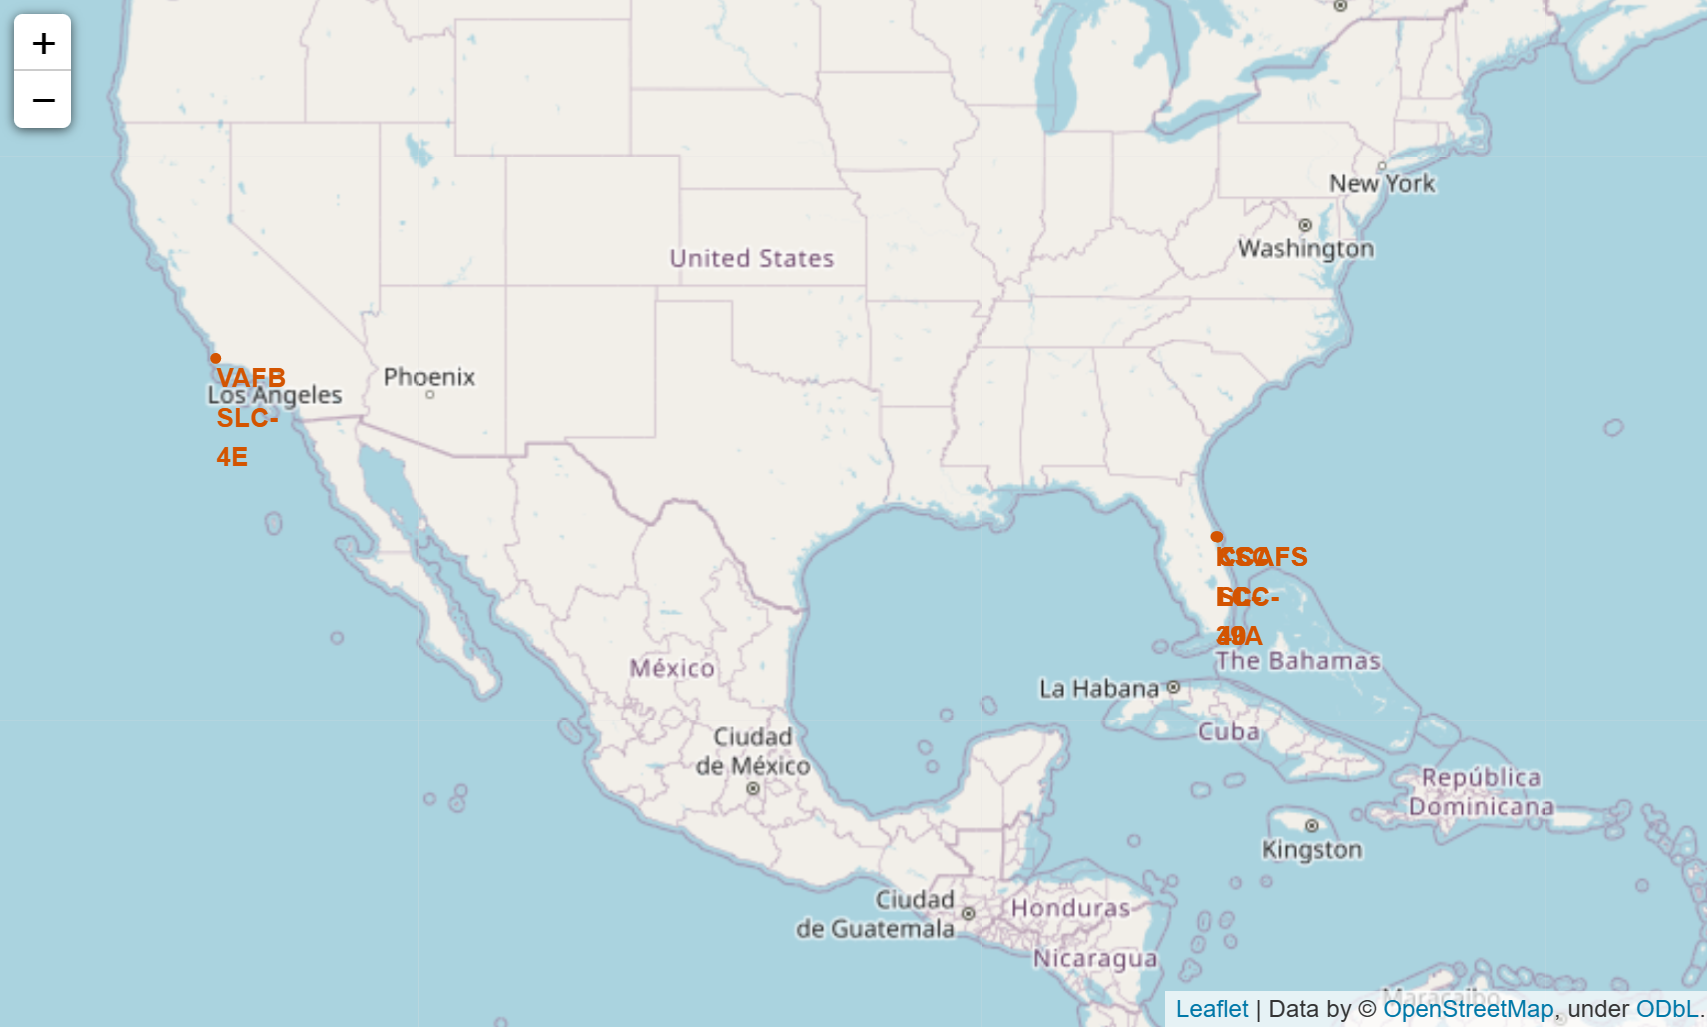

*   All launch sites in proximity to the Equator line
*   All launch sites in very close proximity to the coast

### 2. Mark the success/failed launches for each site on the map

In [12]:
df.tail()

Flight Number        Date Time (UTC) Booster Version   Launch Site  \
51             48  2018-01-31   21:25:00  F9 FT  B1032.2  CCAFS SLC-40   
52             50  2018-03-06    5:33:00     F9 B4 B1044  CCAFS SLC-40   
53             52  2018-04-02   20:30:00  F9 B4  B1039.2  CCAFS SLC-40   
54             53  2018-04-18   22:51:00   F9 B4 B1045.1  CCAFS SLC-40   
55             56  2018-06-04    4:45:00  F9 B4  B1040.2  CCAFS SLC-40   

                                         Payload  Payload Mass (kg)  \
51                             GovSat-1 / SES-16             4230.0   
52                        Hispasat 30W-6  PODSat             6092.0   
53                                 SpaceX CRS-14             2647.0   
54  Transiting Exoplanet Survey Satellite (TESS)              362.0   
55                                        SES-12             5384.0   

        Orbit             Customer       Landing Outcome  class        Lat  \
51        GTO                  SES    Controlled (ocean)      0  28.563197   
52        GTO  Hispasat  NovaWurks            No attempt      0  28.563197   
53  LEO (ISS)           NASA (CRS)            No attempt      0  28.563197   
54        HEO           NASA (LSP)  Success (drone ship)      1  28.563197   
55        GTO                  SES            No attempt      0  28.563197   

        Long  
51 -80.57682  
52 -80.57682  
53 -80.57682  
54 -80.57682  
55 -80.57682

In [13]:
# Create a MarkerCluster object
marker_cluster = MarkerCluster()

In [14]:
# Apply a function to check the value of `class` column
# If class=1, marker_color value will be green
# If class=0, marker_color value will be red
marker_color =[]

for i in df['class']:
    if i == 1:
        i = 'green'
    else:
        i='red'
    marker_color.append(i)
print(marker_color)

['red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'green', 'green', 'red', 'green', 'green', 'green', 'red', 'green', 'green', 'red', 'red', 'green', 'green', 'green', 'green', 'red', 'red', 'red', 'red', 'green', 'red', 'green', 'green', 'red', 'green', 'green', 'red', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'red', 'red', 'red', 'green', 'red']


In [15]:
# add color to df 
df['marker_color'] = marker_color
df.tail(5)

Flight Number        Date Time (UTC) Booster Version   Launch Site  \
51             48  2018-01-31   21:25:00  F9 FT  B1032.2  CCAFS SLC-40   
52             50  2018-03-06    5:33:00     F9 B4 B1044  CCAFS SLC-40   
53             52  2018-04-02   20:30:00  F9 B4  B1039.2  CCAFS SLC-40   
54             53  2018-04-18   22:51:00   F9 B4 B1045.1  CCAFS SLC-40   
55             56  2018-06-04    4:45:00  F9 B4  B1040.2  CCAFS SLC-40   

                                         Payload  Payload Mass (kg)  \
51                             GovSat-1 / SES-16             4230.0   
52                        Hispasat 30W-6  PODSat             6092.0   
53                                 SpaceX CRS-14             2647.0   
54  Transiting Exoplanet Survey Satellite (TESS)              362.0   
55                                        SES-12             5384.0   

        Orbit             Customer       Landing Outcome  class        Lat  \
51        GTO                  SES    Controlled (ocean)      0  28.563197   
52        GTO  Hispasat  NovaWurks            No attempt      0  28.563197   
53  LEO (ISS)           NASA (CRS)            No attempt      0  28.563197   
54        HEO           NASA (LSP)  Success (drone ship)      1  28.563197   
55        GTO                  SES            No attempt      0  28.563197   

        Long marker_color  
51 -80.57682          red  
52 -80.57682          red  
53 -80.57682          red  
54 -80.57682        green  
55 -80.57682          red

In [16]:
site_map.add_child(marker_cluster)
# Add marker_cluster to current site_map:folium.map.Marker(loc,icon).add_to(map)
for index, record in df.iterrows():
    location = [record['Lat'],record['Long']]
    marker=folium.map.Marker(location,
                             icon=folium.Icon(color='white', icon_color=record['marker_color'])
                            )
    marker_cluster.add_child(marker)    
    
site_map


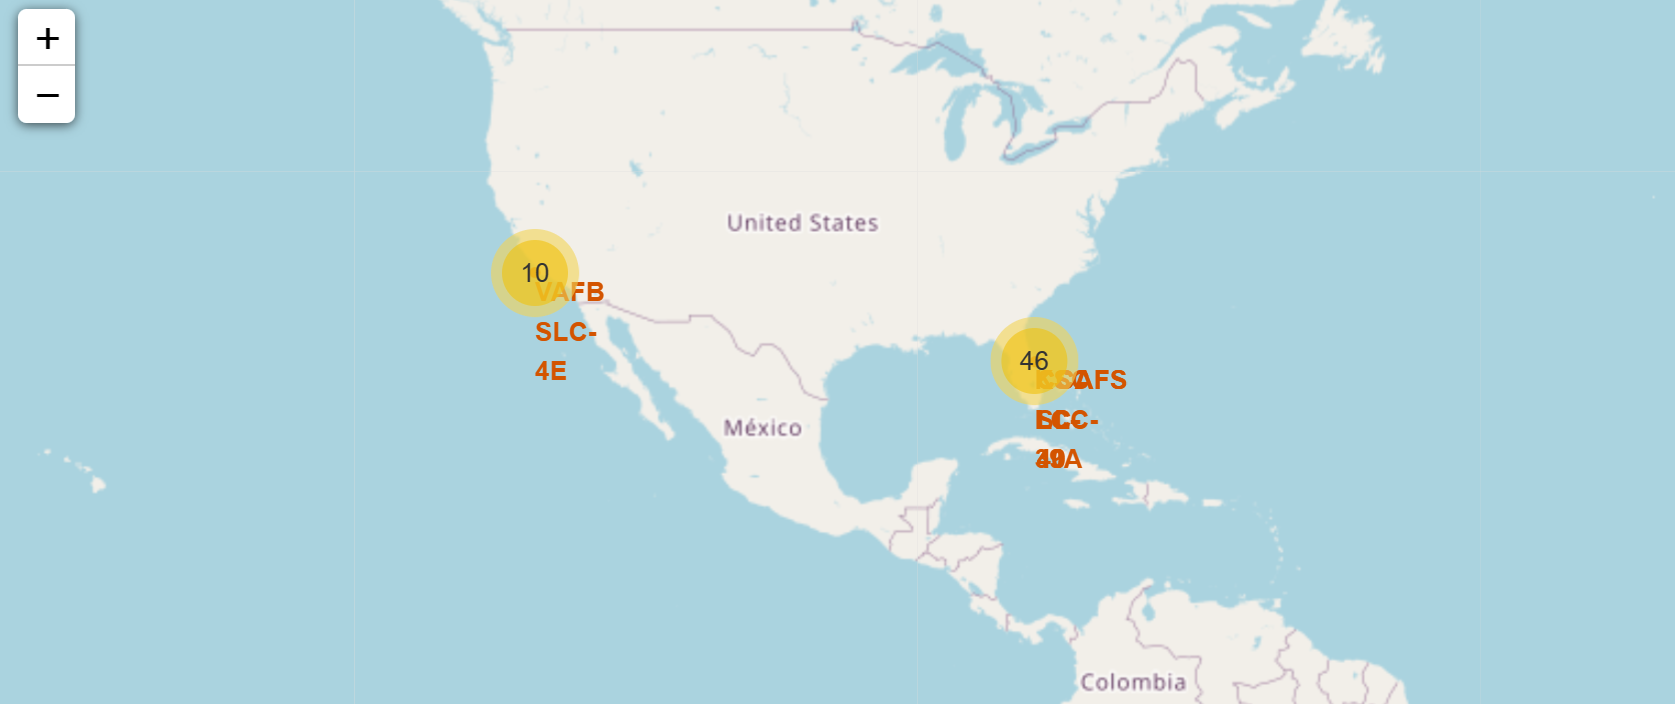

### 3.Calculate the distances between a launch site to its proximities

Let's first add a `MousePosition` on the map to get coordinate for a mouse over a point on the map. As such, while you are exploring the map, you can easily find the coordinates of any points of interests (such as railway)

In [17]:
# Add Mouse Position to get the coordinate (Lat, Long) for a mouse over on the map
formatter = "function(num) {return L.Util.formatNum(num, 5);};"
mouse_position = MousePosition(
    position='topright',
    separator=' Long: ',
    empty_string='NaN',
    lng_first=False,
    num_digits=20,
    prefix='Lat:',
    lat_formatter=formatter,
    lng_formatter=formatter,
)

site_map.add_child(mouse_position)
site_map

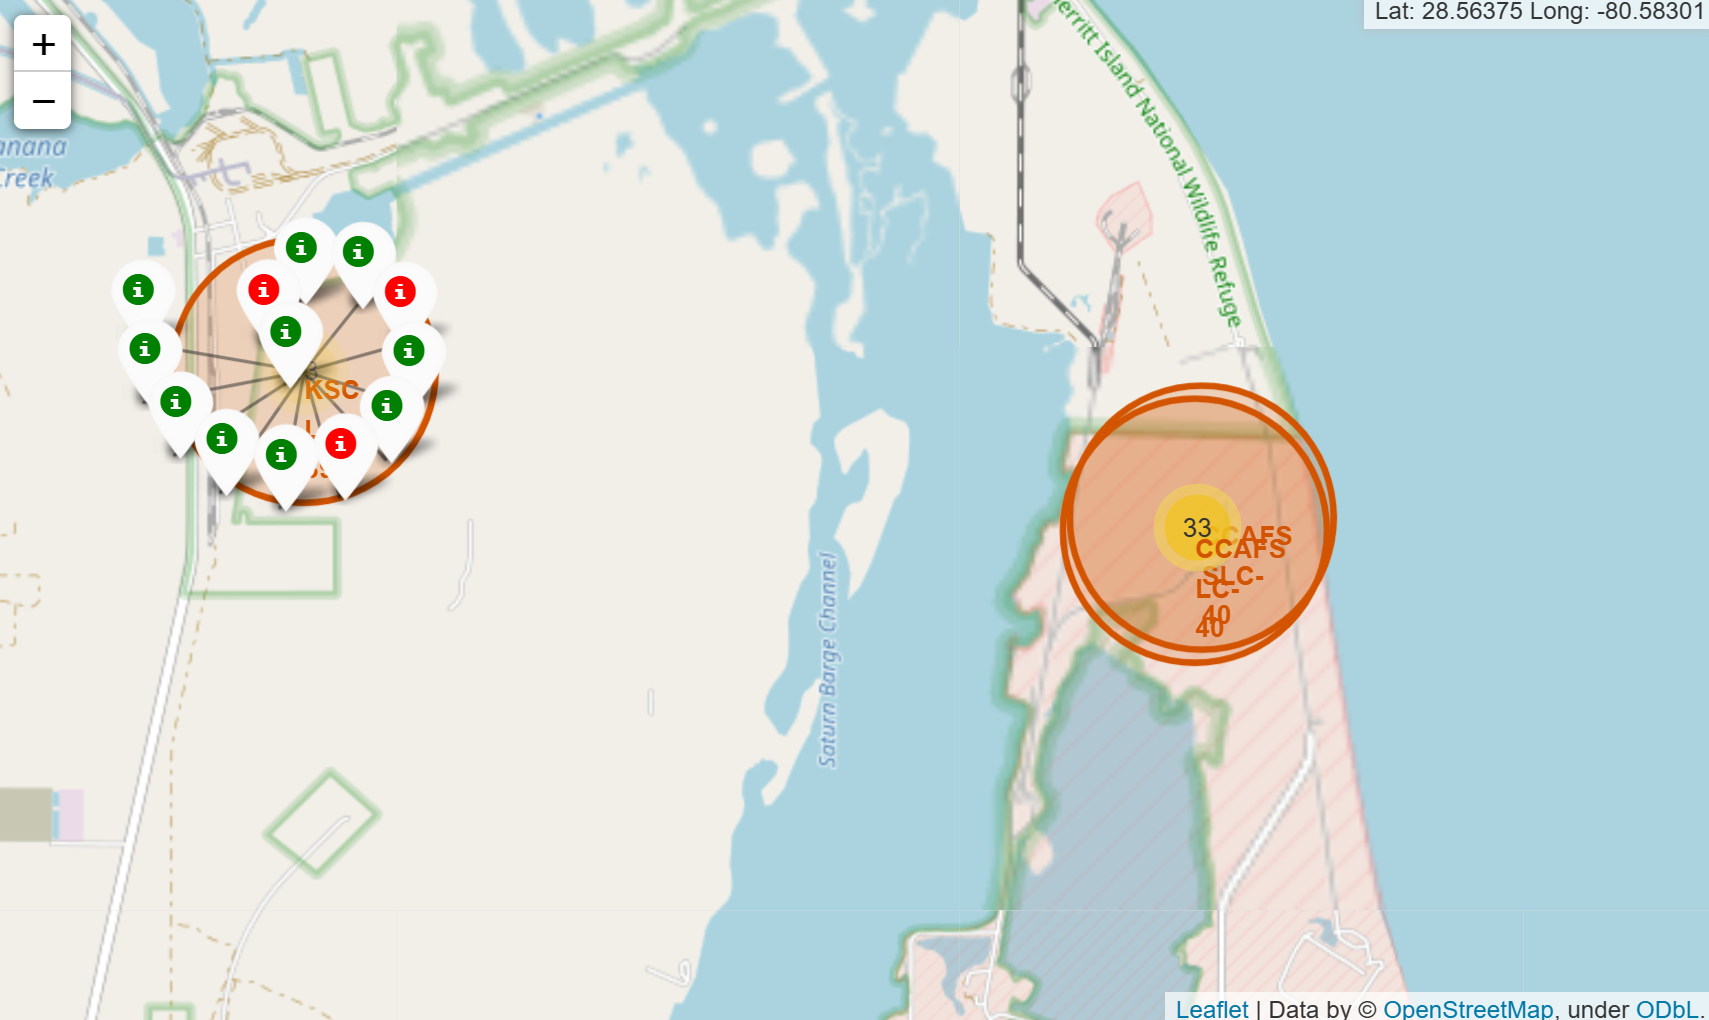

Now zoom in to a launch site and explore its proximity to see if you can easily find any railway, highway, coastline, etc. Move your mouse to these points and mark down their coordinates (shown on the top-left) in order to the distance to the launch site.


In [25]:
from math import sin, cos, sqrt, atan2, radians

def calculate_distance(lat1, lon1, lat2, lon2):
    # approximate radius of earth in km
    R = 6373.0

    lat1 = radians(lat1)
    lon1 = radians(lon1)
    lat2 = radians(lat2)
    lon2 = radians(lon2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c
    return distance

In [26]:
ge

Launch Site        Lat        Long
0   CCAFS LC-40  28.562302  -80.577356
1  CCAFS SLC-40  28.563197  -80.576820
2    KSC LC-39A  28.573255  -80.646895
3   VAFB SLC-4E  34.632834 -120.610745

In [27]:
# find coordinate of from KSC LC-39A to the closet coastline
launch_site2_lat = 28.573255
launch_site2_lon = -80.646895
coastline_lat = 28.58109
coastline_lon  = -80.61355
distance_coastline2 = calculate_distance(launch_site2_lat, launch_site2_lon, coastline_lat, coastline_lon)
distance_coastline2

3.371683766512299

In [24]:
# Create and add a folium.Marker on your selected closest coastline point on the map
# Display the distance between coastline point and launch site using the icon property 
coordinate = [coastline_lat,coastline_lon]
distance_marker = folium.Marker(
    coordinate,
    icon=DivIcon(icon_size=(20,20),icon_anchor=(0,0),html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % "{:10.2f} KM".format(distance_coastline2),
                ))
site_map.add_child(distance_marker)
# Create a `folium.PolyLine` object using the coastline coordinates and launch site coordinate
lines=folium.PolyLine(locations=[[launch_site2_lat,launch_site2_lon],[coastline_lat,coastline_lon]], weight=1)
site_map.add_child(lines)
site_map

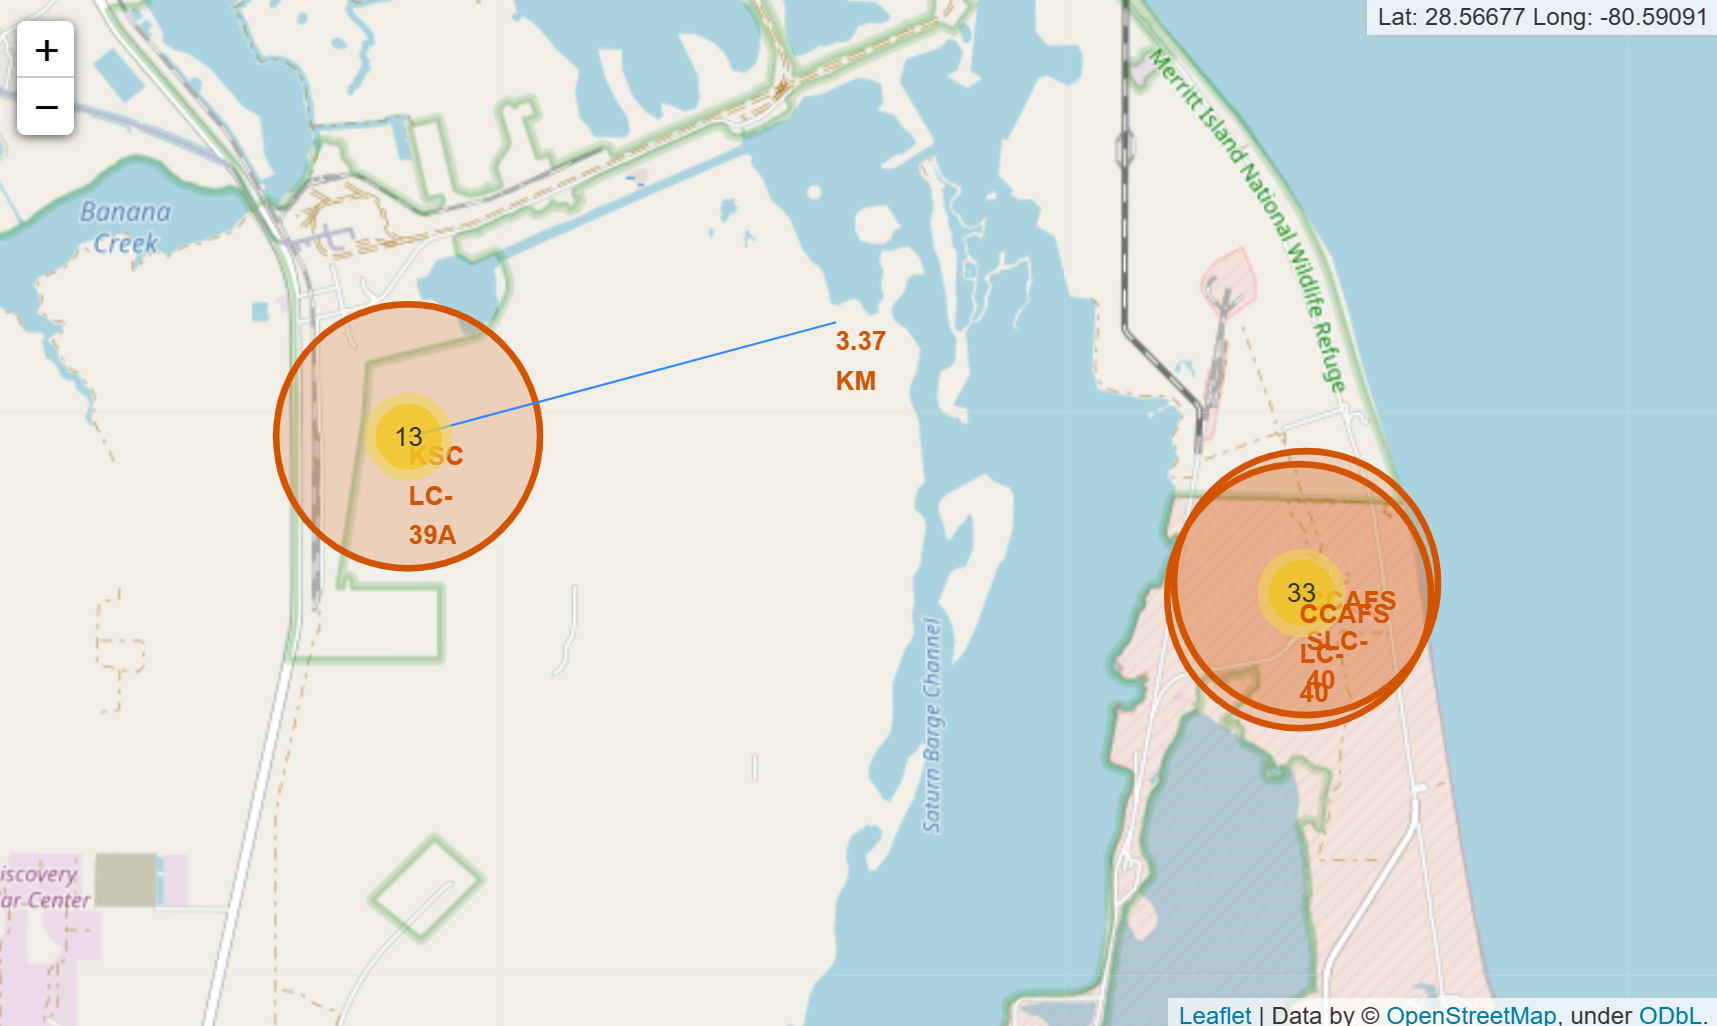

In [31]:
# Create a marker with distance of from KSC LC-39A to a closest city
city_lat = 28.52806
city_lon = -80.65615
distance_city2 = calculate_distance(launch_site2_lat, launch_site2_lon, city_lat, city_lon)
coordinate = [city_lat, city_lon]
distance_marker = folium.Marker(
    coordinate,
    icon=DivIcon(icon_size=(20,20),icon_anchor=(0,0),html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % "{:10.2f} KM".format(distance_city2),
                ))
site_map.add_child(distance_marker)
# Create a `folium.PolyLine` object using the coastline coordinates and launch site coordinate
lines=folium.PolyLine(locations=[[launch_site2_lat,launch_site2_lon],[city_lat,city_lon]], weight=1)
site_map.add_child(lines)
site_map

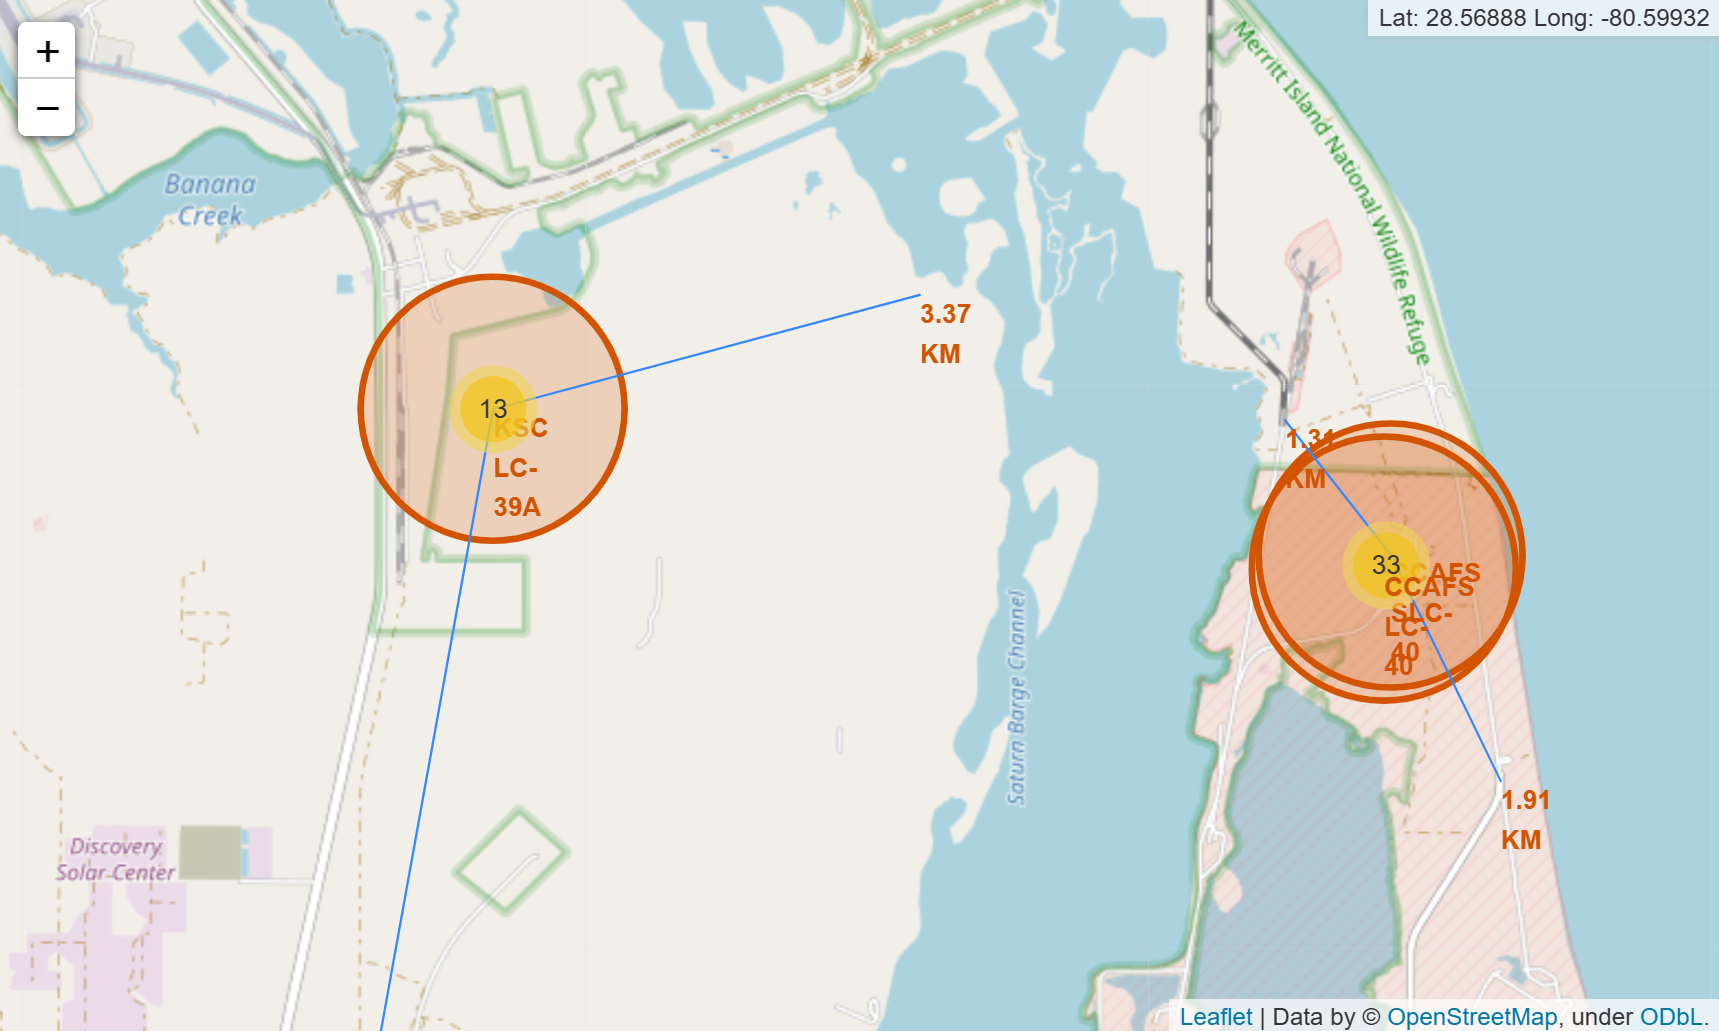

In [32]:
# Create a marker with distance of from CCAFS SLC-40 to a closest railway
launch_site1_lat = 28.563197
launch_site1_lon = -80.576820
railway_lat = 28.57246
railway_lon = -80.58507
distance_railway1 = calculate_distance(launch_site1_lat, launch_site1_lon, railway_lat, railway_lon)
coordinate = [railway_lat, railway_lon]
distance_marker = folium.Marker(
    coordinate,
    icon=DivIcon(icon_size=(20,20),icon_anchor=(0,0),html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % "{:10.2f} KM".format(distance_railway1),
                ))
site_map.add_child(distance_marker)
# Create a `folium.PolyLine` object using the coastline coordinates and launch site coordinate
lines=folium.PolyLine(locations=[[launch_site1_lat,launch_site1_lon],coordinate], weight=1)
site_map.add_child(lines)
site_map

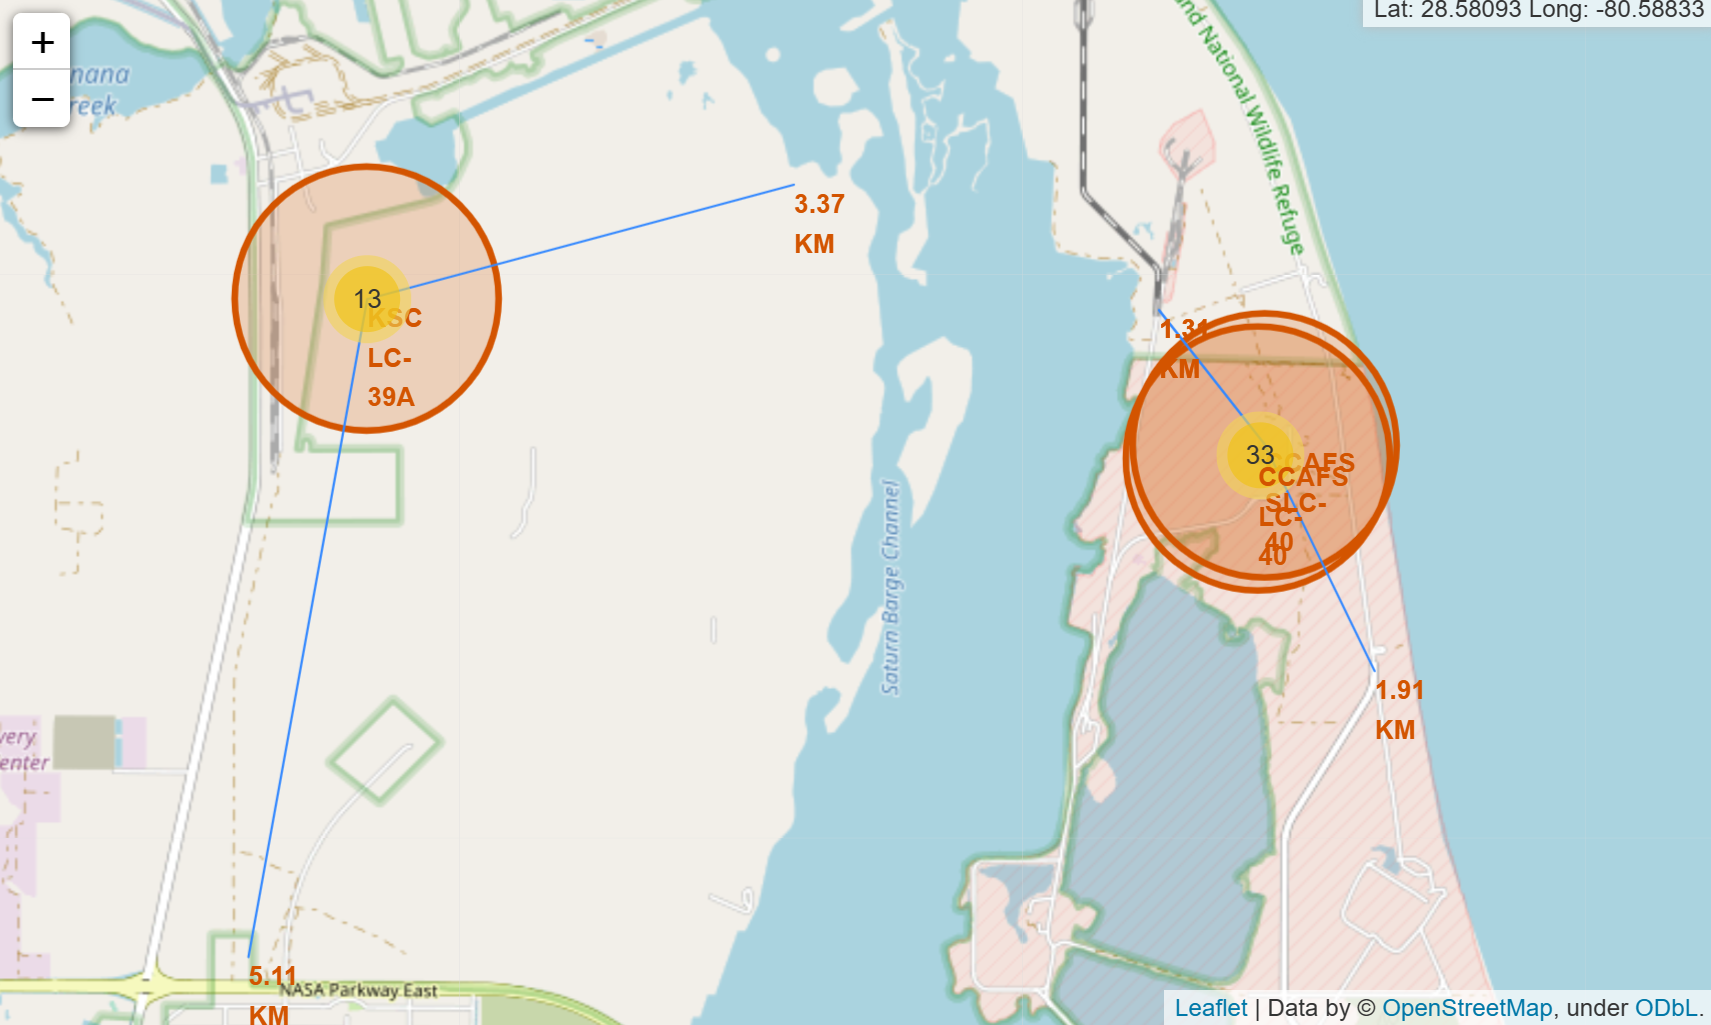

In [33]:
# Create a marker with distance of from CCAFS SLC-40 to a closest highway
highway_lat = 28.54779
highway_lon = -80.56825
distance_highway1 = calculate_distance(launch_site1_lat, launch_site1_lon, highway_lat, highway_lon)
coordinate = [highway_lat, highway_lon]
distance_marker = folium.Marker(
    coordinate,
    icon=DivIcon(icon_size=(20,20),icon_anchor=(0,0),html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % "{:10.2f} KM".format(distance_highway1),
                ))
site_map.add_child(distance_marker)
# Create a `folium.PolyLine` object using the coastline coordinates and launch site coordinate
lines=folium.PolyLine(locations=[[launch_site1_lat,launch_site1_lon],coordinate], weight=1)
site_map.add_child(lines)
site_map

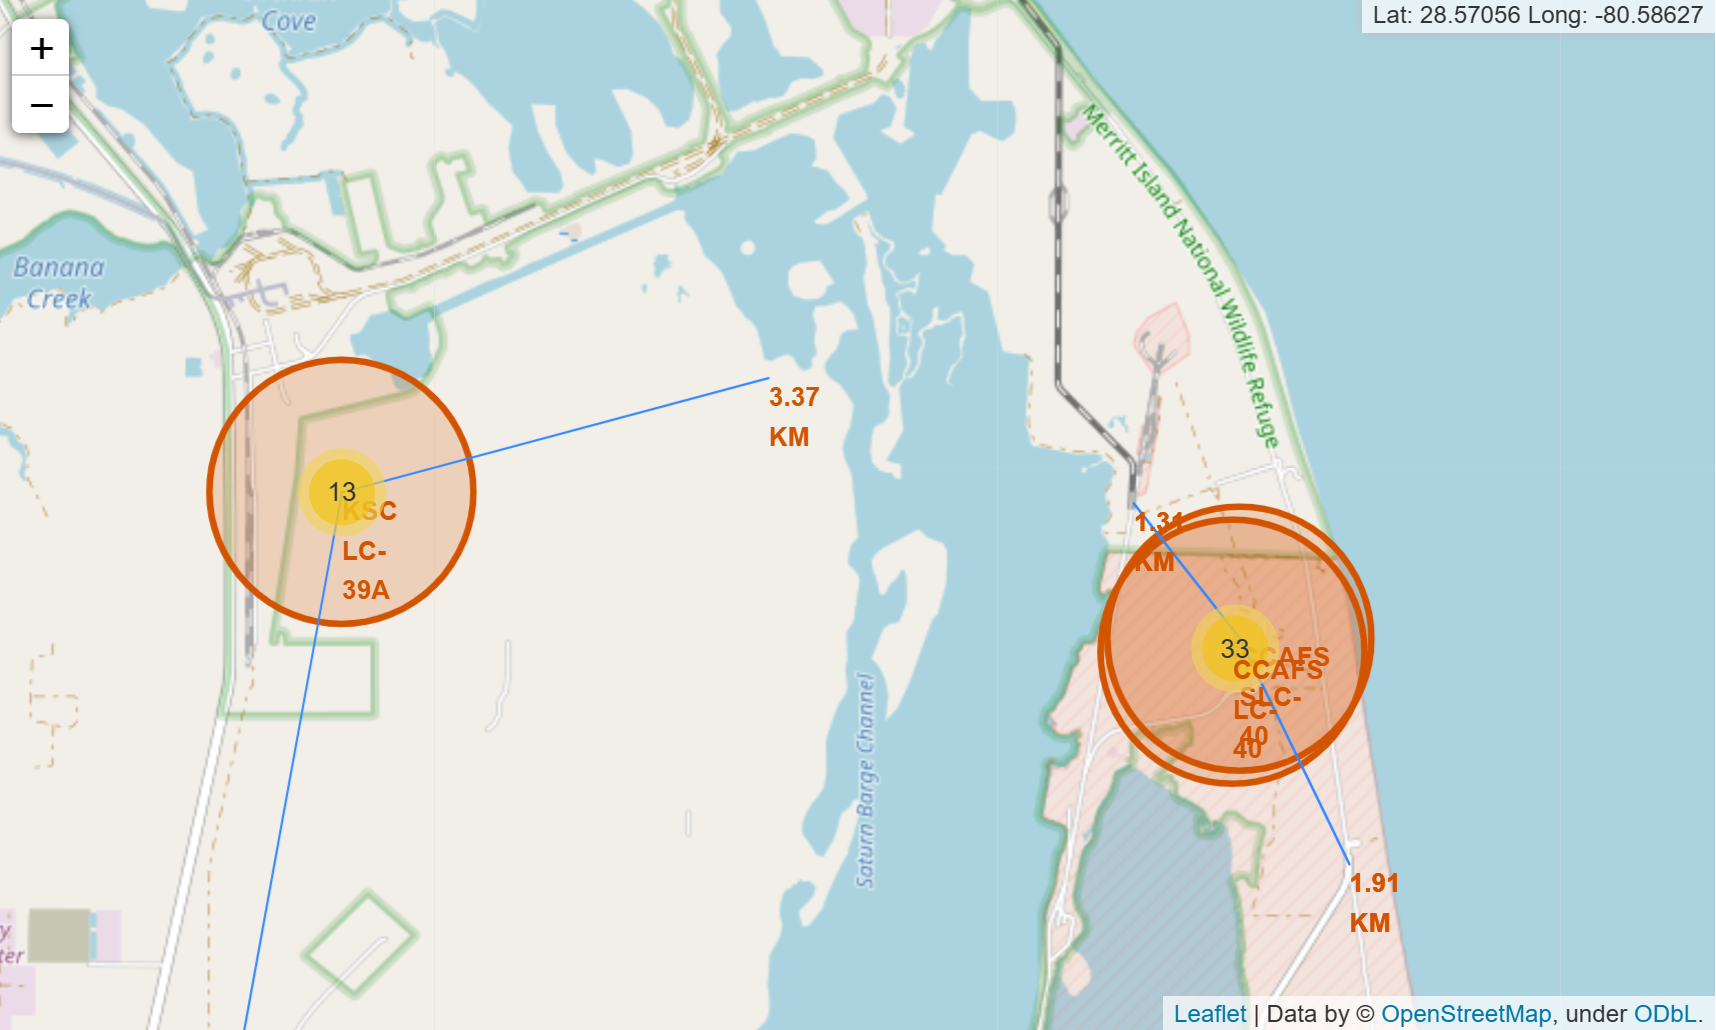

*   Are launch sites in close proximity to railways? yes
*   Are launch sites in close proximity to highways? yes
*   Are launch sites in close proximity to coastline? yes
*   Do launch sites keep certain distance away from cities? yes